In [66]:
#seth hensley
#80105592
#homework 3.a


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

alpha = .001
iterations = 300000
theta = np.zeros(6)
penalty =0.0005

theta = theta.reshape(6,1)

df = pd.read_csv("C:\\Users\\shens\\Desktop\\Housing.csv")

df.guestroom.replace(('yes', 'no'), (1, 0), inplace=True)
df.mainroad.replace(('yes', 'no'), (1, 0), inplace=True)
df.basement.replace(('yes', 'no'), (1, 0), inplace=True)
df.hotwaterheating.replace(('yes', 'no'), (1, 0), inplace=True)
df.airconditioning.replace(('yes', 'no'), (1, 0), inplace=True)
df.prefarea.replace(('yes', 'no'), (1, 0), inplace=True)
df.furnishingstatus.replace(('furnished', 'semi-furnished','unfurnished'), (1, 0.5,0), inplace=True)

dfnorm = df.copy()
dfstand = df.copy()


#standardization
for column in dfstand.columns:
    dfstand[column] =  dfstand[column]/ dfstand[column].abs().max()

#normalization
for column in dfstand.columns:
    dfnorm[column] = (dfnorm[column] - dfnorm[column].min()) / (dfnorm[column].max() - dfnorm[column].min()) 

    
x1s= dfstand.values[:,1]
x2s= dfstand.values[:,2]
x3s= dfstand.values[:,3]
x4s= dfstand.values[:,4]
x10s= dfstand.values[:,10]
Ys = dfstand.values[:,0]


x1n= dfnorm.values[:,1]
x2n= dfnorm.values[:,2]
x3n= dfnorm.values[:,3]
x4n= dfnorm.values[:,4]
x10n= dfnorm.values[:,10]
Yn = dfnorm.values[:,0]

m = len(Ys)

x0 = np.ones((m,1))
x1s =x1s.reshape(m,1)
x2s =x2s.reshape(m,1)
x3s =x3s.reshape(m,1)
x4s =x4s.reshape(m,1)
x10s =x10s.reshape(m,1)
Ys = Ys.reshape(m,1)


x1n =x1n.reshape(m,1)
x2n =x2n.reshape(m,1)
x3n =x3n.reshape(m,1)
x4n =x4n.reshape(m,1)
x10n =x10n.reshape(m,1)
Yn = Yn.reshape(m,1)


Xs= np.hstack((x0, x1s, x2s, x3s, x4s, x10s))
Xn = np.hstack((x0, x1n, x2n, x3n, x4n, x10n))

Xs,Xn

(array([[1.        , 0.45802469, 0.66666667, 0.5       , 0.75      ,
         0.66666667],
        [1.        , 0.55308642, 0.66666667, 1.        , 1.        ,
         1.        ],
        [1.        , 0.61481481, 0.5       , 0.5       , 0.5       ,
         0.66666667],
        ...,
        [1.        , 0.22345679, 0.33333333, 0.25      , 0.25      ,
         0.        ],
        [1.        , 0.17962963, 0.5       , 0.25      , 0.25      ,
         0.        ],
        [1.        , 0.23765432, 0.5       , 0.25      , 0.5       ,
         0.        ]]),
 array([[1.        , 0.39656357, 0.6       , 0.33333333, 0.66666667,
         0.66666667],
        [1.        , 0.5024055 , 0.6       , 1.        , 1.        ,
         1.        ],
        [1.        , 0.57113402, 0.4       , 0.33333333, 0.33333333,
         0.66666667],
        ...,
        [1.        , 0.13539519, 0.2       , 0.        , 0.        ,
         0.        ],
        [1.        , 0.08659794, 0.4       , 0.        , 0.   

In [67]:
from sklearn.model_selection import train_test_split

xsTrain,xsTest,ysTrain,ysTest = train_test_split(Xs,Ys,test_size = .2, random_state = 50)

xnTrain,xnTest,ynTrain,ynTest = train_test_split(Xn,Yn,test_size = .2, random_state = 50)

mtrain = len(xsTrain)
xnTrain,mtrain,xsTrain

(array([[1.        , 0.01752577, 0.8       , 0.        , 0.33333333,
         0.        ],
        [1.        , 0.45360825, 0.4       , 0.        , 0.        ,
         0.66666667],
        [1.        , 0.18900344, 0.6       , 0.        , 0.33333333,
         0.66666667],
        ...,
        [1.        , 0.28865979, 0.2       , 0.        , 0.        ,
         0.66666667],
        [1.        , 0.34123711, 0.6       , 0.33333333, 0.33333333,
         0.33333333],
        [1.        , 0.1257732 , 0.4       , 0.        , 0.33333333,
         0.33333333]]),
 436,
 array([[1.        , 0.11759259, 0.83333333, 0.25      , 0.5       ,
         0.        ],
        [1.        , 0.50925926, 0.5       , 0.25      , 0.25      ,
         0.66666667],
        [1.        , 0.27160494, 0.66666667, 0.25      , 0.5       ,
         0.66666667],
        ...,
        [1.        , 0.36111111, 0.33333333, 0.25      , 0.25      ,
         0.66666667],
        [1.        , 0.40833333, 0.66666667, 0.5       ,

In [68]:
def findLossW_penalties(X, Y, theta):
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) + penalty*np.sum(np.square(theta))
    return J

In [69]:
def gradientDescentLOSS(X, Y, theta, alpha, iterations, m, xTest, yTest):
    
    cost_history = np.zeros(iterations)
    cost_historyTest = np.zeros(iterations)
    for i in range(iterations): 
        predictions = X.dot(theta) 
        errors = np.subtract(predictions, Y) 
        sum_delta = (alpha / m) * X.transpose().dot(errors); 
        theta = theta - sum_delta;
        cost_history[i] = findLossW_penalties(X, Y, theta)
        cost_historyTest[i] = findLossW_penalties(xTest,yTest,theta)
    return theta, cost_history, cost_historyTest

(array([[-0.01088061],
        [ 0.40210795],
        [ 0.07791596],
        [ 0.33824895],
        [ 0.16483663],
        [ 0.08549562]]),
 array([0.07380535, 0.07351554, 0.07322697, ..., 0.00448603, 0.00448603,
        0.00448603]),
 array([0.01441447, 0.01435668, 0.01429914, ..., 0.00082399, 0.00082399,
        0.00082399]))

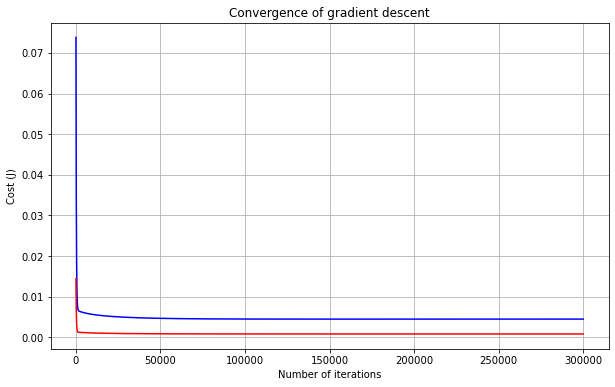

In [70]:
thetaS, lossTrainS, lossTestS = gradientDescentLOSS(Xs,Ys,theta,alpha,iterations, mtrain,xsTest,ysTest)

#thetaS, lossTrainS,lossTestS
plt.plot(range(1, iterations + 1),lossTrainS, color='blue') 
plt.plot(range(1, iterations + 1),lossTestS, color='red') 

plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 

thetaS, lossTrainS, lossTestS # 0.00085421

(array([[0.0432525 ],
        [0.41674038],
        [0.07300776],
        [0.29439765],
        [0.14226681],
        [0.0981485 ]]),
 array([0.00909907, 0.00907382, 0.00904866, ..., 0.00103041, 0.00103041,
        0.00103041]),
 array([0.00909907, 0.00907382, 0.00904866, ..., 0.00103041, 0.00103041,
        0.00103041]))

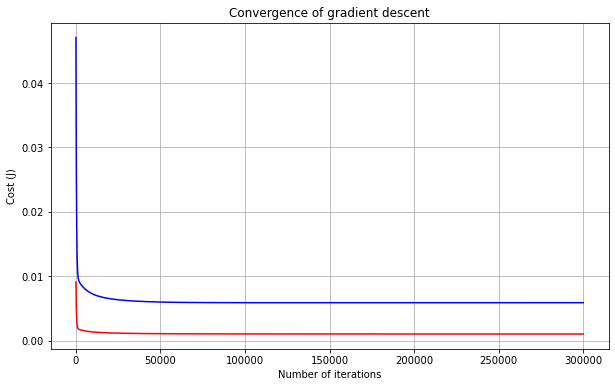

In [71]:
thetaN, lossTrainN, lossTestN = gradientDescentLOSS(Xn,Yn,theta,alpha,iterations, mtrain,xnTest,ynTest)


plt.plot(range(1, iterations + 1),lossTrainN, color='blue') 
plt.plot(range(1, iterations + 1),lossTestN, color='red') 

plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 

thetaN, lossTestN, lossTestN

In [ ]:
#0.00105289